# Machine Learning models regarding my PhD Thesis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Paper1

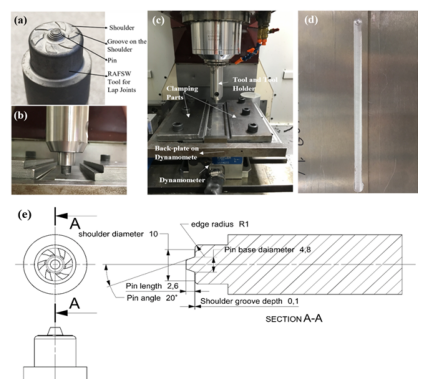

In [7]:
# Load the png image
image1 = mpimg.imread(".\\data\\pic1.png")

# Display the image
plt.imshow(image1)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [22]:
df_fsw = pd.read_csv(".\\data\\paper1.csv")
df_eval = pd.read_csv(".\\data\\paper1_eval.csv")
df_fsw.head()

,P.D. (mm),w (rpm),V (mm/min),F (kN),UTS (MPa)
0,5.75,2500,500,3.4,143
1,5.75,3500,300,3.7,210
2,5.90,2500,300,5.9,208
3,5.90,3500,500,3.5,142
4,6.05,2500,500,5.9,222


In [23]:
# Summary statistics
print(df_fsw.describe())

       P.D. (mm)      w (rpm)  V (mm/min)     F (kN)   UTS (MPa)
count  26.000000    26.000000   26.000000  26.000000   26.000000
mean    6.079615  3455.769231  519.615385   5.269231  213.115385
std     0.134476   456.799064  103.903061   1.080655   40.767955
min     5.750000  2500.000000  300.000000   3.400000  138.000000
25%     6.050000  3500.000000  500.000000   4.200000  208.000000
50%     6.110000  3500.000000  540.000000   5.700000  229.000000
75%     6.150000  3750.000000  590.000000   5.900000  243.500000
max     6.300000  4000.000000  650.000000   7.000000  253.000000


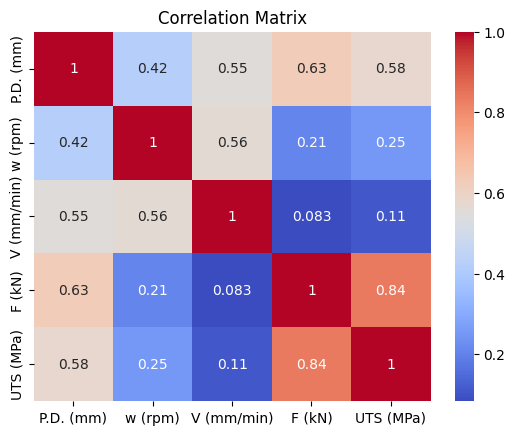

In [24]:
# Correlation matrix
correlation = df_fsw.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

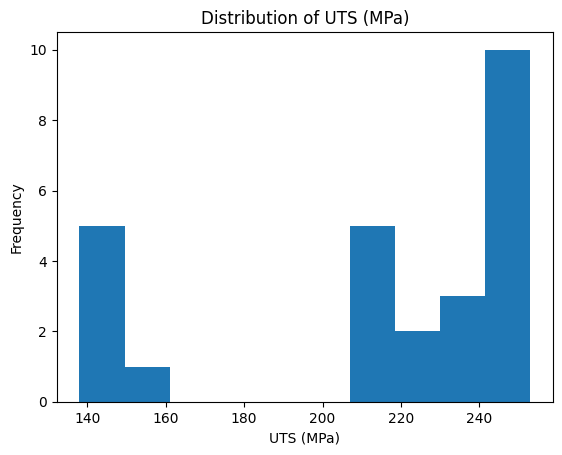

In [3]:
# Data Visualization:

df_fsw['UTS (MPa)'].plot.hist(bins=10)
plt.xlabel('UTS (MPa)')
plt.ylabel('Frequency')
plt.title('Distribution of UTS (MPa)')
plt.show()

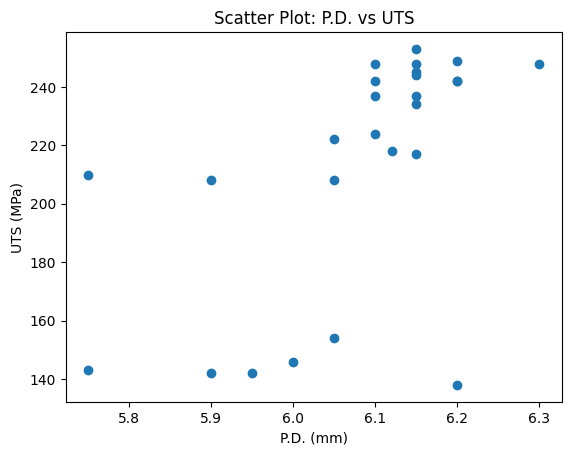

In [4]:
plt.scatter(df_fsw['P.D. (mm)'], df_fsw['UTS (MPa)'])
plt.xlabel('P.D. (mm)')
plt.ylabel('UTS (MPa)')
plt.title('Scatter Plot: P.D. vs UTS')
plt.show()

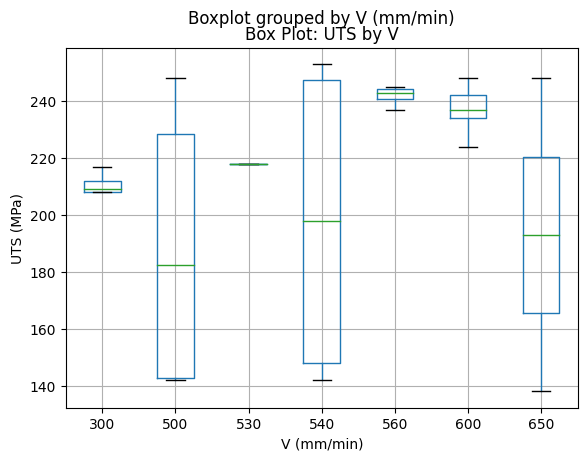

In [5]:
df_fsw.boxplot(column='UTS (MPa)', by='V (mm/min)')
plt.xlabel('V (mm/min)')
plt.ylabel('UTS (MPa)')
plt.title('Box Plot: UTS by V')
plt.show()

In [6]:
# Correlation Analysis:
# Calculate the correlation coefficients between numerical variables to identify relationships and dependencies.

correlation = df_fsw.corr()
print(correlation)

            P.D. (mm)   w (rpm)  V (mm/min)    F (kN)  UTS (MPa)
P.D. (mm)    1.000000  0.421665    0.549641  0.629688   0.578304
w (rpm)      0.421665  1.000000    0.564280  0.206191   0.251376
V (mm/min)   0.549641  0.564280    1.000000  0.083251   0.105490
F (kN)       0.629688  0.206191    0.083251  1.000000   0.838015
UTS (MPa)    0.578304  0.251376    0.105490  0.838015   1.000000


To fit a linear regression machine learning model 

In [7]:
X = df_fsw.drop('UTS (MPa)', axis=1)  # Features
y = df_fsw['UTS (MPa)']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 354.5551383027034
Mean Absolute Error (MAE): 15.789148438722085
R-squared: 0.7488245079619552


In [9]:
# Make predictions on the test data using the trained model
pred_UTS = model.predict(df_eval)

# Display the predicted UTS values
print(pred_UTS)

[208.63780979 238.04753037 278.58246464 244.07558631]


In [10]:
real_UTS = [240, 242, 238, 243]

In [11]:
real_UTS = np.array([240, 242, 238, 243])  # Convert real_UTS to a numpy array for comparison

# Calculate evaluation metrics
mse = mean_squared_error(real_UTS, pred_UTS)
mae = mean_absolute_error(real_UTS, pred_UTS)
r2 = r2_score(real_UTS, pred_UTS)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 661.8255783539067
Mean Absolute Error (MAE): 19.243177700410172
R-squared: -178.47812294343234


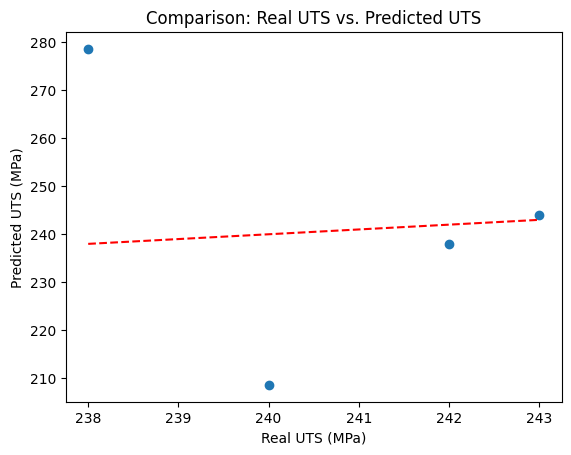

In [12]:
plt.scatter(real_UTS, pred_UTS)
plt.plot([min(real_UTS), max(real_UTS)], [min(real_UTS), max(real_UTS)], color='red', linestyle='--')
plt.xlabel('Real UTS (MPa)')
plt.ylabel('Predicted UTS (MPa)')
plt.title('Comparison: Real UTS vs. Predicted UTS')
plt.show()

## ANN

In [13]:
df_fsw = pd.read_csv(".\\data\\paper1.csv")
df_eval = pd.read_csv(".\\data\\paper1_eval.csv")

In [14]:
# Prepare the data:
X = df_fsw.drop('UTS (MPa)', axis=1)  # Features
y = df_fsw['UTS (MPa)']  # Target variable

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=3000, batch_size=32, verbose=1)

# Evaluate the model:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", loss)

In [17]:
# Scale the features of df_test using the same scaler used for training data
df_eval_scaled = scaler.transform(df_eval.values)

# Make predictions on the scaled test data using the trained model
pred_UTS = model.predict(df_eval_scaled)

# Display the predicted UTS values
print(pred_UTS)

C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
[[248.71933]
 [237.05435]
 [286.60107]
 [244.82881]]


In [18]:
real_UTS = np.array([240, 242, 238, 243])  # Convert real_UTS to a numpy array for comparison

# Calculate evaluation metrics
mse = mean_squared_error(real_UTS, pred_UTS)
mae = mean_absolute_error(real_UTS, pred_UTS)
r2 = r2_score(real_UTS, pred_UTS)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
# print("R-squared:", r2)

Mean Squared Error (MSE): 616.4737790143699
Mean Absolute Error (MAE): 16.02371597290039


number of epochs = 200
Mean Squared Error (MSE): 6874.515670093024
Mean Absolute Error (MAE): 69.9925594329834
    
number of epochs = 1000
Mean Squared Error (MSE): 1680.7118532120367
Mean Absolute Error (MAE): 33.3286247253418
    
number of epochs = 2000
Mean Squared Error (MSE): 1680.7118532120367
Mean Absolute Error (MAE): 33.3286247253418

number of epochs = 3000
Mean Squared Error (MSE): 616.4737790143699
Mean Absolute Error (MAE): 16.02371597290039
    
number of epochs = 4000
Mean Squared Error (MSE): 648.8221595811774
Mean Absolute Error (MAE): 16.045650482177734


In [28]:
data = {
    'Number of Epochs': [200, 1000, 2000, 3000, 4000],
    'Mean Squared Error (MSE)': [6874.515670093024, 1680.7118532120367, 1680.7118532120367, 616.4737790143699, 648.8221595811774],
    'Mean Absolute Error (MAE)': [69.9925594329834, 33.3286247253418, 33.3286247253418, 16.02371597290039, 16.045650482177734]
}

df_epochs = pd.DataFrame(data)

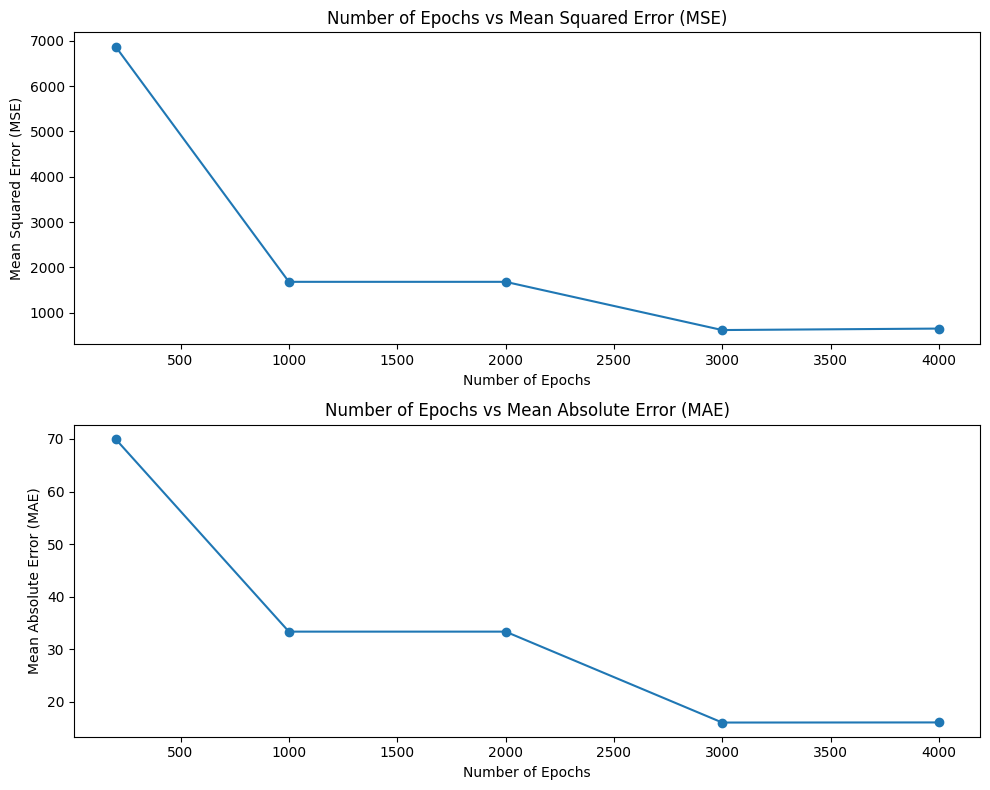

In [30]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of epochs vs MSE
ax1.plot(df_epochs['Number of Epochs'], df_epochs['Mean Squared Error (MSE)'], marker='o')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_title('Number of Epochs vs Mean Squared Error (MSE)')

# Plot the number of epochs vs MAE
ax2.plot(df_epochs['Number of Epochs'], df_epochs['Mean Absolute Error (MAE)'], marker='o')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.set_title('Number of Epochs vs Mean Absolute Error (MAE)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

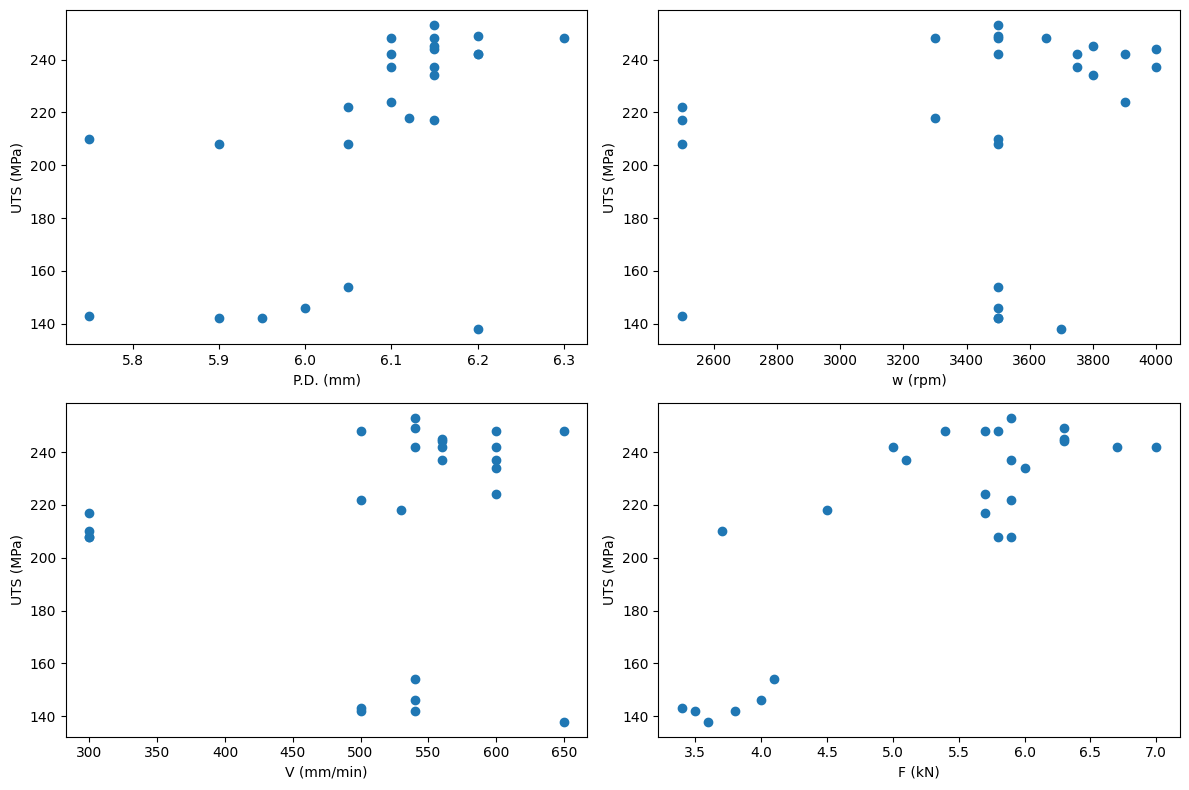

In [33]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Create scatter plots for each input parameter
axs[0, 0].scatter(df_fsw['P.D. (mm)'], df_fsw['UTS (MPa)'])
axs[0, 0].set_xlabel('P.D. (mm)')
axs[0, 0].set_ylabel('UTS (MPa)')

axs[0, 1].scatter(df_fsw['w (rpm)'], df_fsw['UTS (MPa)'])
axs[0, 1].set_xlabel('w (rpm)')
axs[0, 1].set_ylabel('UTS (MPa)')

axs[1, 0].scatter(df_fsw['V (mm/min)'], df_fsw['UTS (MPa)'])
axs[1, 0].set_xlabel('V (mm/min)')
axs[1, 0].set_ylabel('UTS (MPa)')

axs[1, 1].scatter(df_fsw['F (kN)'], df_fsw['UTS (MPa)'])
axs[1, 1].set_xlabel('F (kN)')
axs[1, 1].set_ylabel('UTS (MPa)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

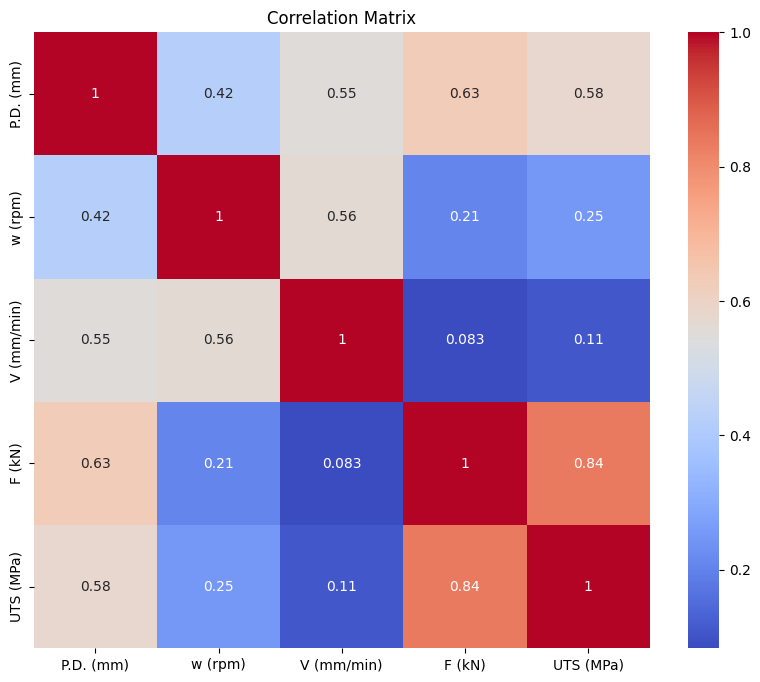

In [36]:
# Compute the correlation matrix
corr_matrix = df_fsw.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

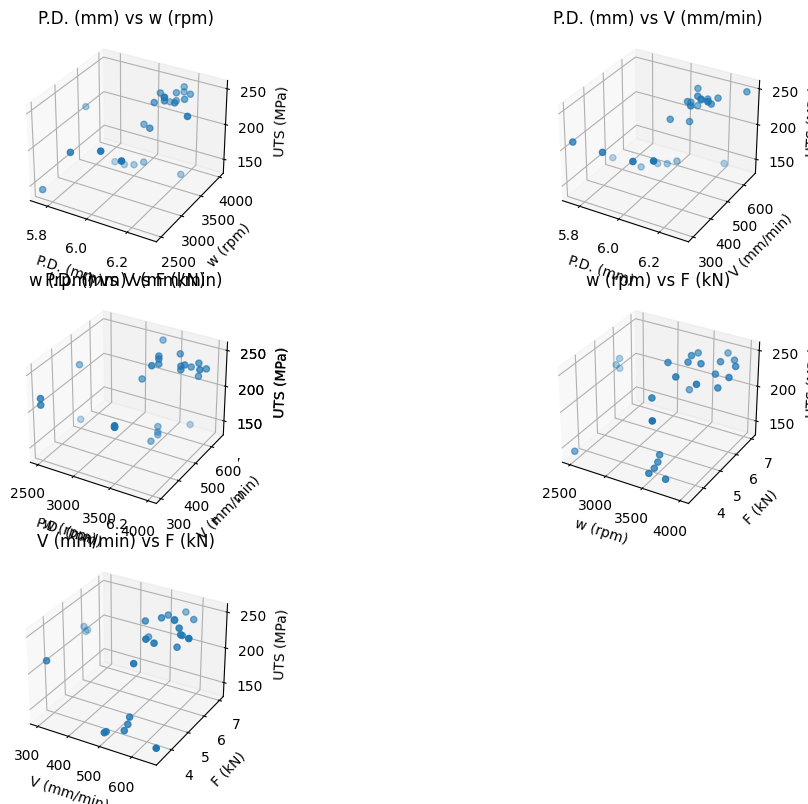

In [37]:
# Create a 3D scatter plot for each pair of input parameters
fig = plt.figure(figsize=(12, 8))

# Loop through each pair of input parameters
for i, param1 in enumerate(df_fsw.columns[:-1]):
    for j, param2 in enumerate(df_fsw.columns[i+1:-1]):
        # Create a subplot for the pair of input parameters
        ax = fig.add_subplot(3, 2, (i*2)+(j+1), projection='3d')
        
        # Scatter plot the input parameters against the target parameter
        ax.scatter(df_fsw[param1], df_fsw[param2], df_fsw['UTS (MPa)'])
        
        # Set labels for the axes
        ax.set_xlabel(param1)
        ax.set_ylabel(param2)
        ax.set_zlabel('UTS (MPa)')
        
        # Set a title for the subplot
        ax.set_title(f'{param1} vs {param2}')
        
# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()


In [ ]:
numE = 

To optimize by hyper parameter uning

In [ ]:
# Define a function to create the neural network model
def create_model(hidden_units=64, activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(hidden_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(hidden_units, activation=activation),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Score (MSE):", -grid_result.best_score_)

# Make predictions on the test data using the best model
best_model = grid_result.best_estimator_
pred_UTS = best_model.predict(X_test_scaled)

# Evaluate the best model on the test data
mse = mean_squared_error(y_test, pred_UTS)
print("Mean Squared Error (MSE):", mse)

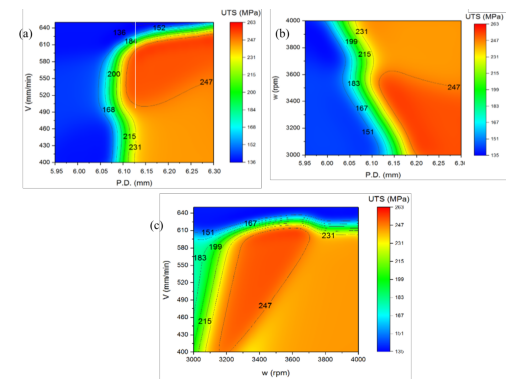

In [9]:
# Load the JPEG image
image2 = mpimg.imread(".\\data\\pic2.png")

# Display the image
plt.imshow(image2)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Paper3

In [25]:
df_fsw = pd.read_csv(".\\data\\paper3.csv")
df_eval = pd.read_csv(".\\data\\paper3_eval.csv")
df_fsw.head()

,PL (mm),SD (mm),SGD (mm),PBD (mm),PA (ø),PLD (mm),V (mm/min),w (rpm),PD (mm),C,DAF (kN),FF (kN)
0,1.8,8.5,0.10,4.0,20,0.25,1400,3500,1.80,1,2600,2994
1,1.8,8.5,0.10,4.0,20,0.25,1400,3500,1.85,1,3060,4453
2,1.8,9.5,0.10,4.0,20,0.45,2000,5000,1.80,2,2500,3390
3,1.8,9.5,0.10,4.0,20,0.45,2000,5000,1.85,2,3120,3937
4,1.8,10.5,0.25,4.8,24,0.25,1400,3500,1.80,2,2900,5373


In [26]:
# Summary statistics
print(df_fsw.describe())

         PL (mm)    SD (mm)  SGD (mm)   PBD (mm)     PA (ø)   PLD (mm)  \
count  36.000000  36.000000  36.00000  36.000000  36.000000  36.000000   
mean    2.258333  10.250000   0.18750   4.430556  22.500000   0.363889   
std     0.482034   1.284523   0.08567   0.420081   2.171241   0.101144   
min     1.750000   8.500000   0.10000   3.500000  20.000000   0.250000   
25%     1.800000   9.250000   0.10000   4.000000  20.000000   0.250000   
50%     2.200000  10.500000   0.25000   4.500000  24.000000   0.450000   
75%     2.600000  11.500000   0.25000   4.800000  24.000000   0.450000   
max     3.000000  12.000000   0.30000   5.000000  25.000000   0.500000   

        V (mm/min)      w (rpm)    PD (mm)          C     DAF (kN)  \
count    36.000000    36.000000  36.000000  36.000000    36.000000   
mean   1780.555556  4395.833333   2.291667   1.500000  3615.388889   
std     332.797188   754.451078   0.483218   0.507093   655.552778   
min    1400.000000  3500.000000   1.750000   1.000000

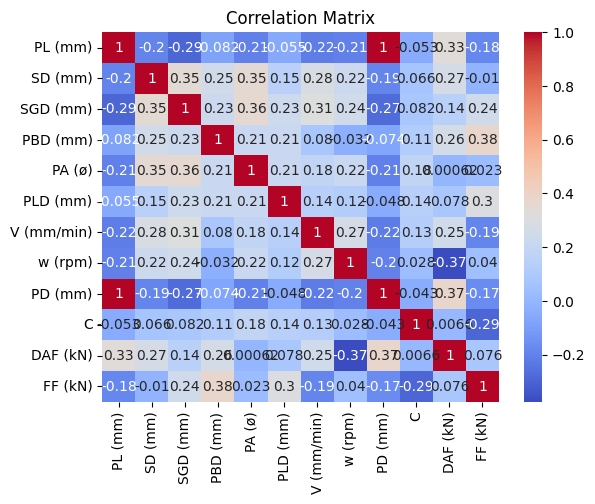

In [27]:
# Correlation matrix
correlation = df_fsw.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

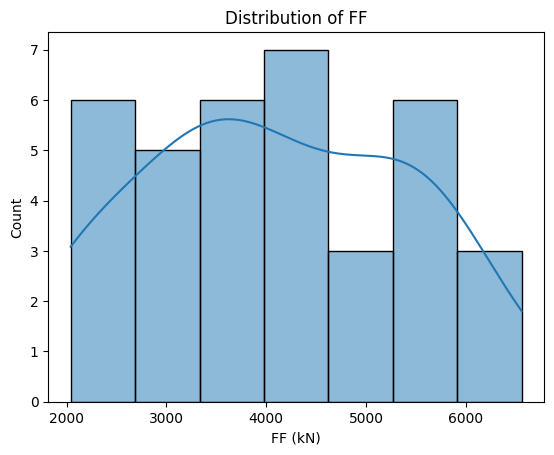

In [28]:
# Distribution of target feature (FF)
sns.histplot(df_fsw['FF (kN)'], kde=True)
plt.xlabel('FF (kN)')
plt.ylabel('Count')
plt.title('Distribution of FF')
plt.show()

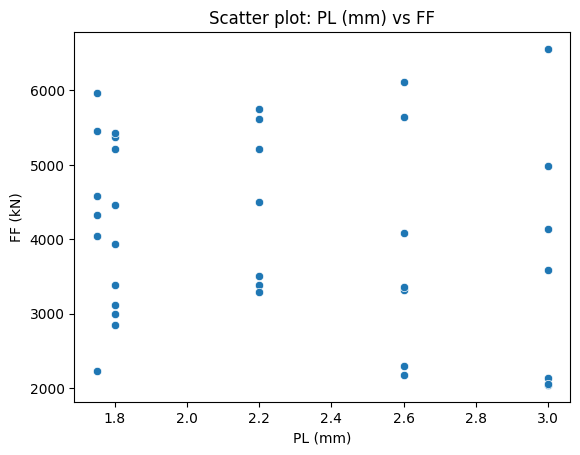

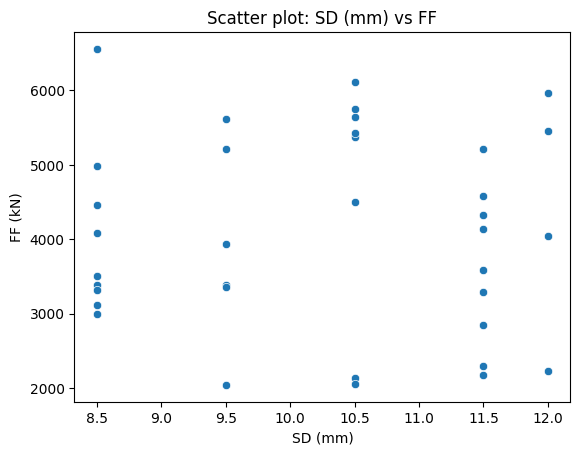

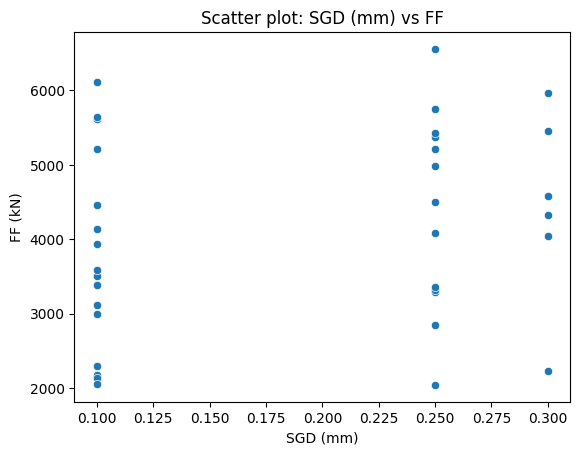

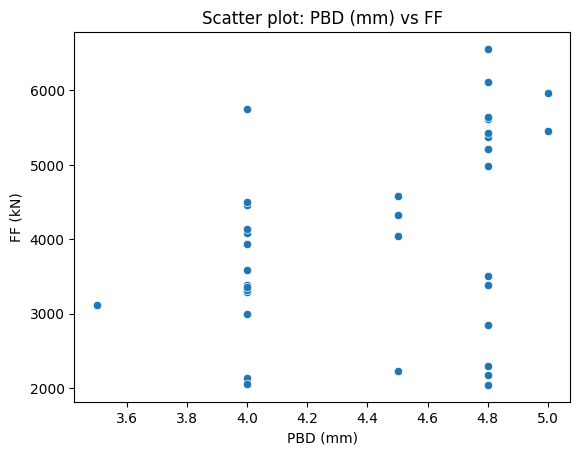

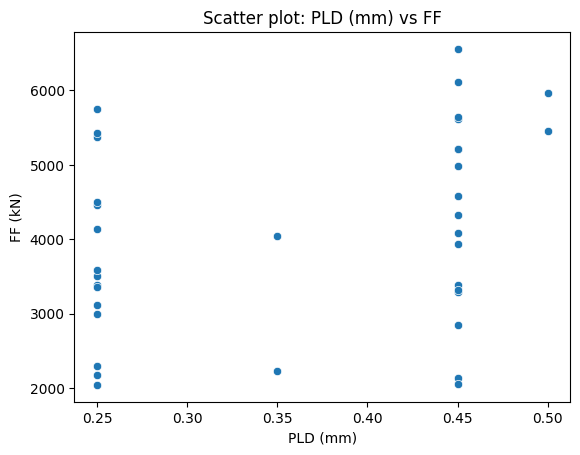

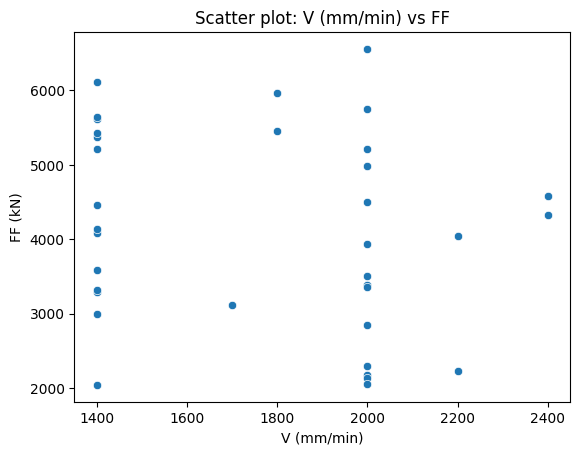

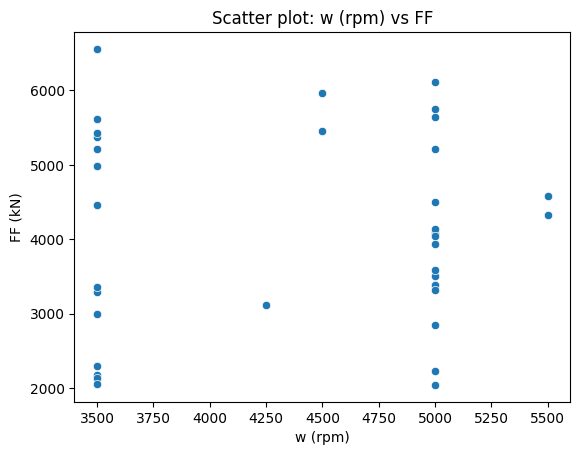

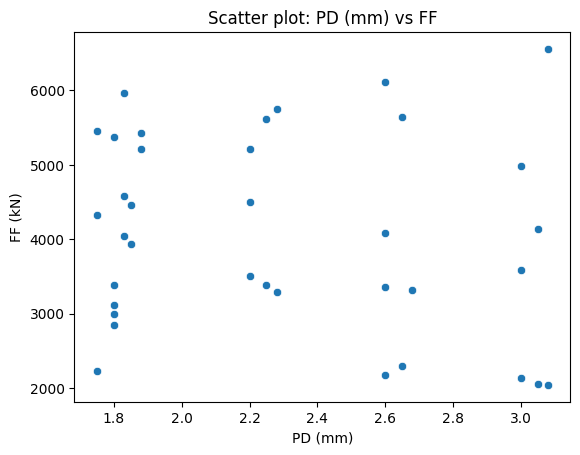

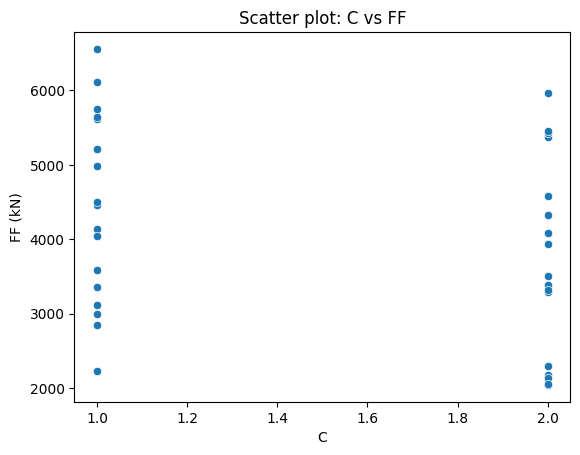

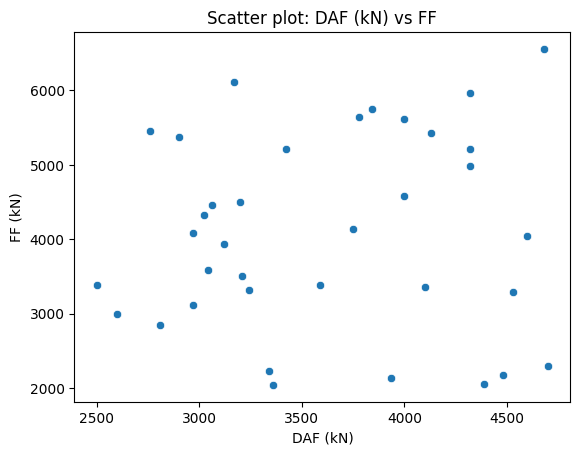

In [29]:
# Scatter plots of target feature against other numerical features
numerical_columns = ['PL (mm)', 'SD (mm)', 'SGD (mm)', 'PBD (mm)', 'PLD (mm)',
                     'V (mm/min)', 'w (rpm)', 'PD (mm)', 'C', 'DAF (kN)']

for column in numerical_columns:
    sns.scatterplot(data=df_fsw, x=column, y='FF (kN)')
    plt.xlabel(column)
    plt.ylabel('FF (kN)')
    plt.title(f'Scatter plot: {column} vs FF')
    plt.show()

In [30]:
# Correlation Analysis:
# Calculate the correlation coefficients between numerical variables to identify relationships and dependencies.

correlation = df_fsw.corr()
print(correlation)

             PL (mm)   SD (mm)  SGD (mm)  PBD (mm)    PA (ø)  PLD (mm)  \
PL (mm)     1.000000 -0.197264 -0.293182 -0.082425 -0.206107 -0.055184   
SD (mm)    -0.197264  1.000000  0.347262  0.252831  0.353428  0.148441   
SGD (mm)   -0.293182  0.347262  1.000000  0.225272  0.357125  0.234936   
PBD (mm)   -0.082425  0.252831  0.225272  1.000000  0.214576  0.211634   
PA (ø)     -0.206107  0.353428  0.357125  0.214576  1.000000  0.214668   
PLD (mm)   -0.055184  0.148441  0.234936  0.211634  0.214668  1.000000   
V (mm/min) -0.217139  0.282382  0.311914  0.079988  0.179910  0.135574   
w (rpm)    -0.206721  0.222959  0.244510 -0.032492  0.215843  0.122467   
PD (mm)     0.997304 -0.188495 -0.273828 -0.073871 -0.206691 -0.048423   
C          -0.052599  0.065795  0.082211  0.114007  0.181650  0.139266   
DAF (kN)    0.332812  0.269352  0.142206  0.262746  0.000622  0.078298   
FF (kN)    -0.183974 -0.010210  0.244638  0.375386  0.022739  0.299554   

            V (mm/min)   w (rpm)   PD

### To fit a linear regression machine learning model 

In [32]:
X = df_fsw.drop('FF (kN)', axis=1)  # Features
y = df_fsw['FF (kN)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 2249036.4025538033
Mean Absolute Error (MAE): 1340.6984064360172
R-squared: -0.10311569703066614


In [34]:
# Make predictions on the test data using the trained model
pred_FF = model.predict(df_eval)

# Display the predicted UTS values
print(pred_FF)

[3356.62676862 3609.02895049 3423.21213933 3397.95601517]


In [35]:
real_FF = [2709, 4746, 2123, 3982]

In [36]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 935945.6455824057
Mean Absolute Error (MAE): 917.213485571705
R-squared: 0.1208166306981453


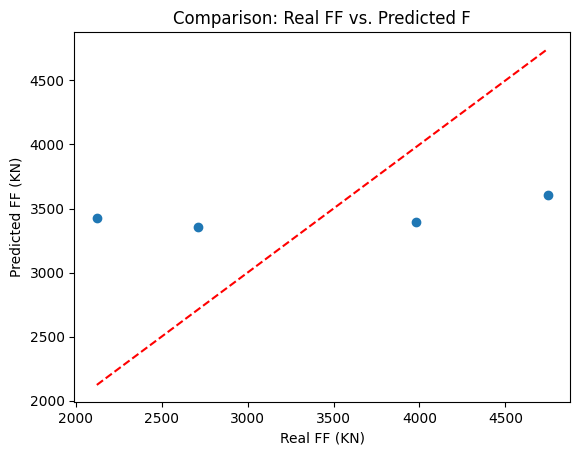

In [37]:
plt.scatter(real_FF, pred_FF)
plt.plot([min(real_FF), max(real_FF)], [min(real_FF), max(real_FF)], color='red', linestyle='--')
plt.xlabel('Real FF (KN)')
plt.ylabel('Predicted FF (KN)')
plt.title('Comparison: Real FF vs. Predicted F')
plt.show()

### MLPRegressor

In [38]:
df_fsw = pd.read_csv(".\\data\\paper3.csv")
df_eval = pd.read_csv(".\\data\\paper3_eval.csv")

In [39]:
# Step 1: Split the data into input features (X) and target variable (y)
X = df_fsw.drop("FF (kN)", axis=1)  # Input features (all columns except the target variable)
y = df_fsw["FF (kN)"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 3: Create and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2559306.0963677973


In [40]:
# Make predictions on the scaled test data using the trained model
pred_FF = model.predict(df_eval)

# Display the predicted UTS values
print(pred_FF)

[3734.52289773 4542.69773659 4448.29375821 4216.70780615]


In [41]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 1638776.960076393
Mean Absolute Error (MAE): 947.206681373755
R-squared: -0.5393900875490101


### ANN TensorFlow

In [1]:
df_fsw = pd.read_csv(".\\data\\paper3.csv")
df_eval = pd.read_csv(".\\data\\paper3_eval.csv")

In [2]:
X = df_fsw.drop('FF (kN)', axis=1)  # Features
y = df_fsw['FF (kN)']  # Target variable

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=8000, batch_size=32, verbose=1)


# Evaluate the model:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", loss)

In [4]:
# Scale the features of df_test using the same scaler used for training data
df_eval_scaled = scaler.transform(df_eval.values)

# Make predictions on the scaled test data using the trained model
pred_FF = model.predict(df_eval_scaled)

# Display the predicted UTS values
print(pred_FF)

1/1 [==============================] - 0s 109ms/step
[[2396.4817]
 [3516.7625]
 [1853.1521]
 [3688.328 ]]


C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 441938.462195456
Mean Absolute Error (MAE): 526.3189697265625
R-squared: 0.5848637706142608


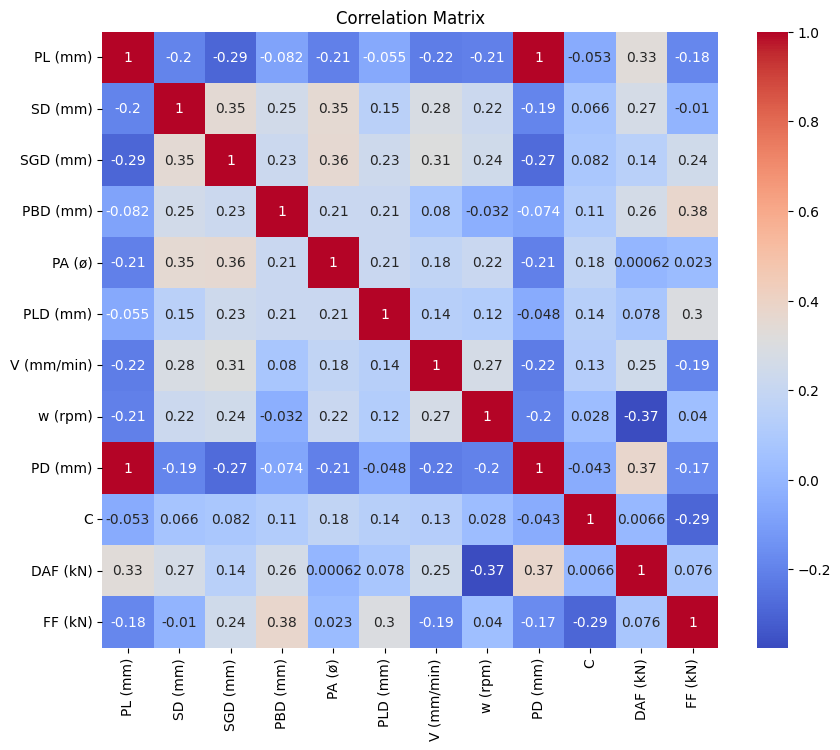

In [7]:
# Compute the correlation matrix
corr_matrix = df_fsw.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

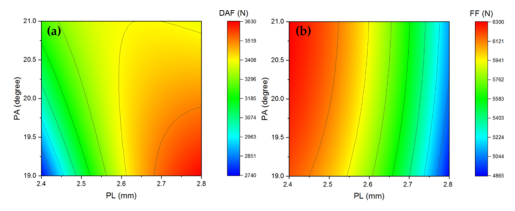

In [10]:
# Load the JPEG image
image3 = mpimg.imread(".\\data\\pic3.png")
image4 = mpimg.imread(".\\data\\pic4.png")
image5 = mpimg.imread(".\\data\\pic5.png")

# Display the image
plt.imshow(image3)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

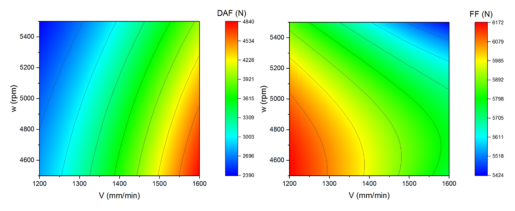

In [11]:
plt.imshow(image4)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

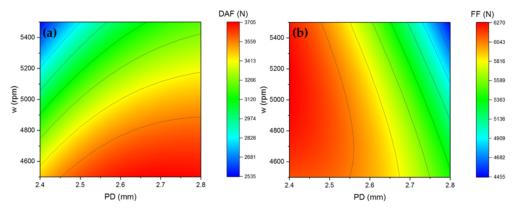

In [12]:
plt.imshow(image5)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Paper 4

In [11]:
df_fsw = pd.read_csv(".\\data\\paper4.csv")
df_eval = pd.read_csv(".\\data\\paper4_eval.csv")
df_fsw.head()

,V (mm/min),w (rpm),PD (mm),OL (mm),DAF (N),FF (N)
0,1300,3500,2.60,11.8,2930,7661
1,1300,4250,2.65,15.6,3630,7261
2,1300,5000,2.70,18.8,4040,6063
3,1600,3500,2.65,18.9,3950,7373
4,1600,4250,2.70,11.6,3860,6374


In [12]:
# Summary statistics
print(df_fsw.describe())

        V (mm/min)      w (rpm)    PD (mm)    OL (mm)      DAF (N)  \
count    13.000000    13.000000  13.000000  13.000000    13.000000   
mean   1700.000000  4292.307692   2.641692  15.969231  3691.538462   
std     326.598632   631.085755   0.044960   2.881951   524.973748   
min    1300.000000  3500.000000   2.560000  11.100000  2930.000000   
25%    1300.000000  3500.000000   2.600000  15.600000  3490.000000   
50%    1600.000000  4250.000000   2.650000  15.600000  3630.000000   
75%    2000.000000  5000.000000   2.677000  18.700000  3950.000000   
max    2100.000000  5000.000000   2.700000  18.900000  4700.000000   

            FF (N)  
count    13.000000  
mean   6493.692308  
std     868.884379  
min    4864.000000  
25%    5848.000000  
50%    6612.000000  
75%    7261.000000  
max    7661.000000  


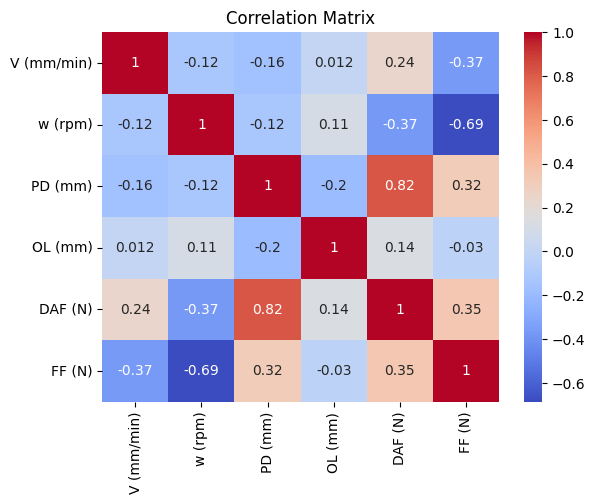

In [13]:
# Correlation matrix
correlation = df_fsw.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

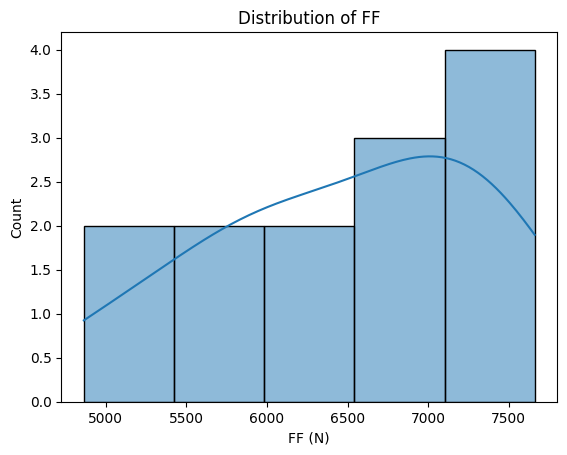

In [15]:
# Distribution of target feature (FF)
sns.histplot(df_fsw['FF (N)'], kde=True)
plt.xlabel('FF (N)')
plt.ylabel('Count')
plt.title('Distribution of FF')
plt.show()

In [16]:
# Correlation Analysis:
# Calculate the correlation coefficients between numerical variables to identify relationships and dependencies.

correlation = df_fsw.corr()
print(correlation)

            V (mm/min)   w (rpm)   PD (mm)   OL (mm)   DAF (N)    FF (N)
V (mm/min)    1.000000 -0.123315 -0.164012  0.011510  0.237671 -0.366897
w (rpm)      -0.123315  1.000000 -0.124619  0.110053 -0.373109 -0.685550
PD (mm)      -0.164012 -0.124619  1.000000 -0.195594  0.815991  0.315312
OL (mm)       0.011510  0.110053 -0.195594  1.000000  0.136963 -0.030288
DAF (N)       0.237671 -0.373109  0.815991  0.136963  1.000000  0.352934
FF (N)       -0.366897 -0.685550  0.315312 -0.030288  0.352934  1.000000


## Linear Regression

In [17]:
X = df_fsw.drop('FF (N)', axis=1)  # Features
y = df_fsw['FF (N)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 686918.0368433216
Mean Absolute Error (MAE): 700.0660122643652
R-squared: -8.1888560219826


In [19]:
# Make predictions on the test data using the trained model
pred_FF = model.predict(df_eval)

# Display the predicted UTS values
print(pred_FF)

[5801.50549704 5472.34853415 7597.71092257 7038.7475297 ]


In [20]:
real_FF = [6812, 7066, 7660, 7653]

In [21]:
real_FF = np.array([6812, 7066, 7660, 7653])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 985502.5403852705
Mean Absolute Error (MAE): 820.1718791336257
R-squared: -6.20543085841389


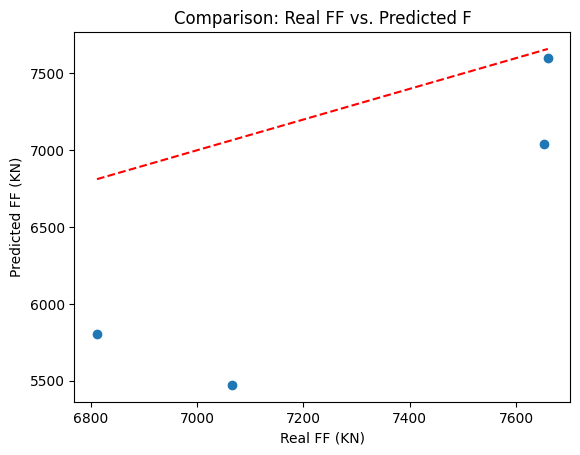

In [22]:
plt.scatter(real_FF, pred_FF)
plt.plot([min(real_FF), max(real_FF)], [min(real_FF), max(real_FF)], color='red', linestyle='--')
plt.xlabel('Real FF (KN)')
plt.ylabel('Predicted FF (KN)')
plt.title('Comparison: Real FF vs. Predicted F')
plt.show()

### ANN TensorFlow

In [1]:
df_fsw = pd.read_csv(".\\data\\paper4.csv")
df_eval = pd.read_csv(".\\data\\paper4_eval.csv")

In [2]:
X = df_fsw.drop('FF (N)', axis=1)  # Features
y = df_fsw['FF (N)']  # Target variable

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=3500, batch_size=32, verbose=1)


# Evaluate the model:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", loss)

In [4]:
# Scale the features of df_test using the same scaler used for training data
df_eval_scaled = scaler.transform(df_eval.values)

# Make predictions on the scaled test data using the trained model
pred_FF = model.predict(df_eval_scaled)

# Display the predicted UTS values
print(pred_FF)

C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
[[4560.231]
 [5199.442]
 [7972.367]
 [5827.817]]


In [5]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 10313700.527581394
Mean Absolute Error (MAE): 2499.9642333984375
R-squared: -8.688205744220179


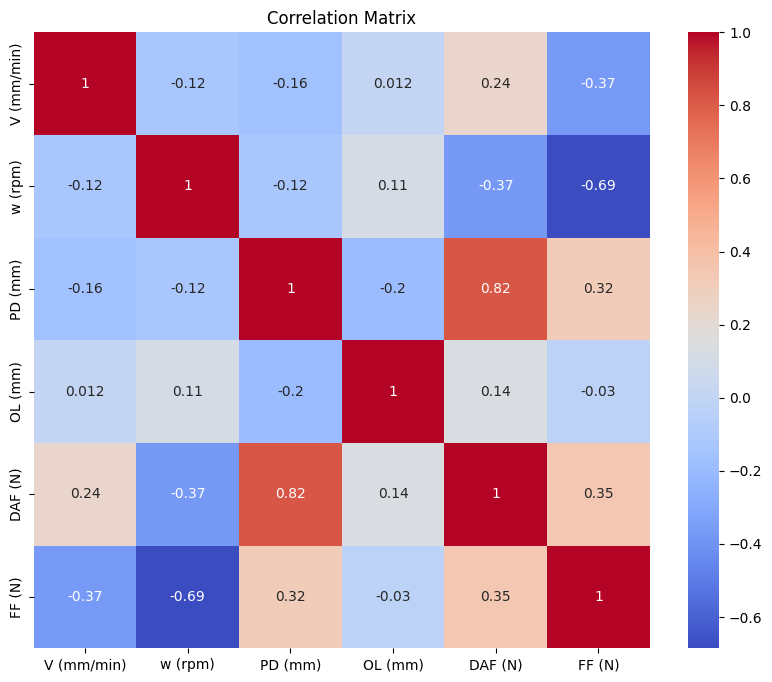

In [6]:
# Compute the correlation matrix
corr_matrix = df_fsw.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

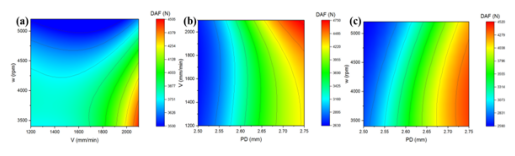

In [13]:
# Load the JPEG image
image6 = mpimg.imread(".\\data\\pic6.png")
image7 = mpimg.imread(".\\data\\pic7.png")
image8 = mpimg.imread(".\\data\\pic8.png")
image9 = mpimg.imread(".\\data\\pic9.png")
image10 = mpimg.imread(".\\data\\pic10.png")

# Display the image
plt.imshow(image6)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

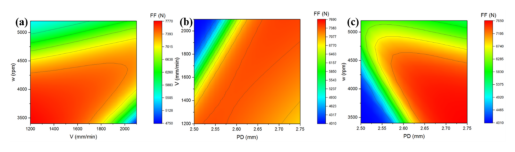

In [14]:
plt.imshow(image7)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

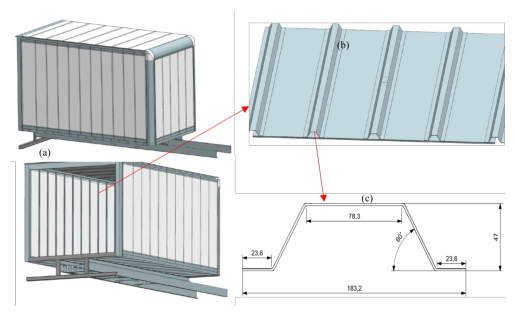

In [15]:
plt.imshow(image8)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

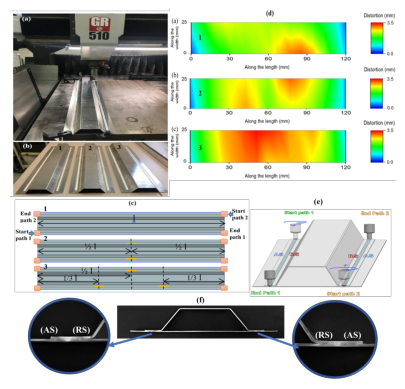

In [16]:
plt.imshow(image9)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

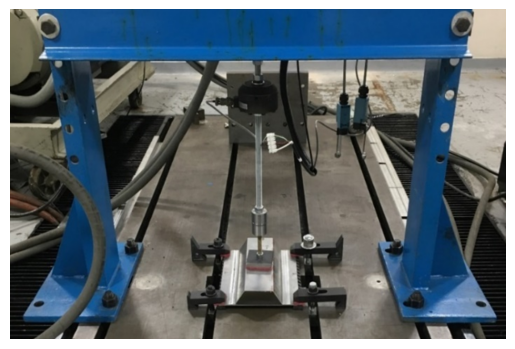

In [17]:
plt.imshow(image10)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()